In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37978 entries, 0 to 37977
Columns: 199 entries, Quantity Sold (kilo) to Category Name_solanum
dtypes: bool(197), float64(2)
memory usage: 7.7 MB


In [3]:
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_artemisia stelleriana,Item Name_basil,...,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
17146,0.105556,17.838889,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8707,0.400000,14.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3604,0.411111,14.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# define dependent and non dependent variables
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-01-11 18:34:04.958754: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-11 18:34:04.958787: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-11 18:34:04.958797: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-11 18:34:04.959147: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-11 18:34:04.959423: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([30382, 198]), TensorShape([3798, 198]), (3798, 198))

In [6]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(2)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_artemisia stelleriana,Item Name_basil,...,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
3204,1.000000,4.9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
321,0.357143,5.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [8]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(198, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, 198))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 15

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/15


2024-01-11 18:34:12.672180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


950/950 [==============================] - 17s 16ms/step - loss: 0.3211 - mae: 0.3211 - val_loss: 0.2204 - val_mae: 0.2204
Epoch 2/15
950/950 [==============================] - 15s 16ms/step - loss: 0.2037 - mae: 0.2037 - val_loss: 0.1927 - val_mae: 0.1927
Epoch 3/15
950/950 [==============================] - 15s 16ms/step - loss: 0.1829 - mae: 0.1829 - val_loss: 0.1740 - val_mae: 0.1740
Epoch 4/15
950/950 [==============================] - 14s 15ms/step - loss: 0.1617 - mae: 0.1617 - val_loss: 0.1509 - val_mae: 0.1509
Epoch 5/15
950/950 [==============================] - 14s 15ms/step - loss: 0.1364 - mae: 0.1364 - val_loss: 0.1275 - val_mae: 0.1275
Epoch 6/15
950/950 [==============================] - 15s 16ms/step - loss: 0.1160 - mae: 0.1160 - val_loss: 0.1093 - val_mae: 0.1093
Epoch 7/15
950/950 [==============================] - 15s 16ms/step - loss: 0.1001 - mae: 0.1001 - val_loss: 0.0968 - val_mae: 0.0968
Epoch 8/15
950/950 [==============================] - 15s 16ms/step - los

In [9]:
import matplotlib.pyplot as plt

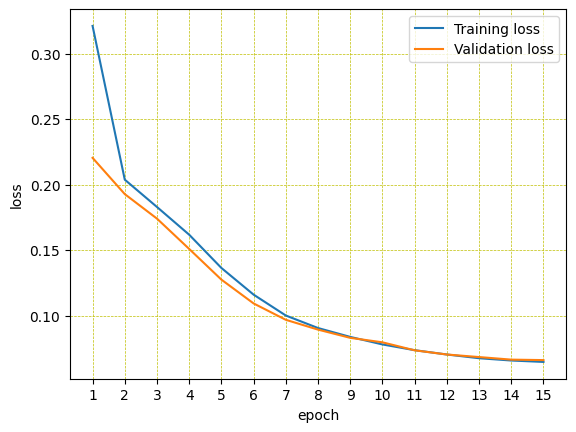

In [10]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training loss')
plt.plot(x_range, val_loss, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(x_range) 
plt.legend()
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [11]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(198, activation='relu', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, 198))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(128, activation='relu'))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.LSTM(32))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 8

history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/8
950/950 [==============================] - 17s 16ms/step - loss: 0.3183 - mae: 0.3183 - val_loss: 0.2230 - val_mae: 0.2230
Epoch 2/8
950/950 [==============================] - 15s 16ms/step - loss: 0.2064 - mae: 0.2064 - val_loss: 0.1961 - val_mae: 0.1961
Epoch 3/8
950/950 [==============================] - 15s 15ms/step - loss: 0.1870 - mae: 0.1870 - val_loss: 0.1794 - val_mae: 0.1794
Epoch 4/8
950/950 [==============================] - 15s 16ms/step - loss: 0.1667 - mae: 0.1667 - val_loss: 0.1555 - val_mae: 0.1555
Epoch 5/8
950/950 [==============================] - 15s 15ms/step - loss: 0.1390 - mae: 0.1390 - val_loss: 0.1314 - val_mae: 0.1314
Epoch 6/8
950/950 [==============================] - 15s 16ms/step - loss: 0.1189 - mae: 0.1189 - val_loss: 0.1123 - val_mae: 0.1123
Epoch 7/8
950/950 [==============================] - 15s 16ms/step - loss: 0.1025 - mae: 0.1025 - val_loss: 0.0997 - val_mae: 0.0997
Epoch 8/8
950/950 [==============================] - 14s 15ms/step - 

In [12]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 198)               39402     
                                                                 
 reshape_1 (Reshape)         (None, 1, 198)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            167424    
                                                                 
 dense_5 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_6 (Dense)             (None, 1, 64)             8256      
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                

In [13]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

119/119 [==============================] - 1s 7ms/step - loss: 0.0853 - mae: 0.0853


[0.08525385707616806, 0.08525385707616806]

In [14]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

119/119 [==============================] - 1s 6ms/step


array([[0.9616153 ],
       [0.19059497],
       [0.99988925],
       [0.3249798 ],
       [0.3676355 ]], dtype=float32)

In [15]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.        , 0.26666668, 1.        , 0.23333333, 0.35      ],
      dtype=float32)>

In [18]:
# save final model
final_model.save('sales_prediction_model')

INFO:tensorflow:Assets written to: final_sold_amount_model/assets


INFO:tensorflow:Assets written to: final_sold_amount_model/assets
